In [24]:
import DataLoader
import importlib
import pandas as pd
import CoverageHelper
import matplotlib.pyplot as plt
%matplotlib inline
coverage_df = DataLoader.load_csv_coverage()
importlib.reload(DataLoader)

Number of apps: 
412


Total covered methods:
4068564


Everything is good!


In [28]:
importlib.reload(CoverageHelper)

<module 'CoverageHelper' from 'C:\\Master\\Thesis\\IncubatorDataAnalyser\\CoverageHelper.py'>

Coverage report

In [47]:
coverage_df.head()

,package,class,method,strategy,coverage_type,coverage_percentage,covered_lines,total_lines,app
3846081,com.speedupbrowser4g5g,com.speedupbrowser4g5g.BuildConfig,BuildConfig (): void,systematic,block,0,0,3,com.speedupbrowser4g5g
3846083,com.speedupbrowser4g5g,com.speedupbrowser4g5g.R,R (): void,systematic,block,0,0,3,com.speedupbrowser4g5g
3846085,com.speedupbrowser4g5g,com.speedupbrowser4g5g.R$anim,R$anim (): void,systematic,block,0,0,3,com.speedupbrowser4g5g
3846087,com.speedupbrowser4g5g,com.speedupbrowser4g5g.R$attr,R$attr (): void,systematic,block,0,0,3,com.speedupbrowser4g5g
3846089,com.speedupbrowser4g5g,com.speedupbrowser4g5g.R$bool,R$bool (): void,systematic,block,0,0,3,com.speedupbrowser4g5g
3846091,com.speedupbrowser4g5g,com.speedupbrowser4g5g.R$color,R$color (): void,systematic,block,0,0,3,com.speedupbrowser4g5g
3846093,com.speedupbrowser4g5g,com.speedupbrowser4g5g.R$dimen,R$dimen (): void,systematic,block,0,0,3,com.speedupbrowser4g5g
3846095,com.speedupbrowser4g5g,com.speedupbrowser4g5g.R$drawable,R$drawable (): void,systematic,block,0,0,3,com.speedupbrowser4g5g
3846097,com.speedupbrowser4g5g,com.speedupbrowser4g5g.R$id,R$id (): void,systematic,block,0,0,3,com.speedupbrowser4g5g
3846099,com.speedupbrowser4g5g,com.speedupbrowser4g5g.R$integer,R$integer (): void,systematic,block,0,0,3,com.speedupbrowser4g5g


Systematic App coverage

In [34]:
systematic_method_coverage = CoverageHelper.filter("method", "systematic", coverage_df)
systematic_coverage_per_app = CoverageHelper.calc_coverage(systematic_method_coverage)
systematic_coverage_per_app.head()
# systematic_coverage_per_app.plot.box()


app
alex.map.maps                                    21.951220
androidlab.carlog                                19.076923
appinventor.ai_agiapplications.CountYourSteps     0.000000
asp.aniemo.pack6.ext                             31.250000
bestfreelivewallpapers.funny_photo_editor         4.419621
Name: percentage_covered, dtype: float64

Random App coverage

In [35]:
random_method_coverage = CoverageHelper.filter("method", "random", coverage_df)
random_coverage_per_app = CoverageHelper.calc_coverage(random_method_coverage)
random_coverage_per_app.head()
# random_coverage_per_app.plot.box()

app
alex.map.maps                                    51.219512
androidlab.carlog                                17.230769
appinventor.ai_agiapplications.CountYourSteps     0.000000
asp.aniemo.pack6.ext                             31.250000
bestfreelivewallpapers.funny_photo_editor         6.605148
Name: percentage_covered, dtype: float64

Plot random vs systematic app coverage per app

,random,systematic
count,412.000000,412.000000
mean,22.195151,20.586701
std,18.177584,17.528328
min,0.000000,0.000000
25%,8.652004,7.209172
50%,17.550341,16.022451
75%,33.899996,31.441248
max,100.000000,100.000000


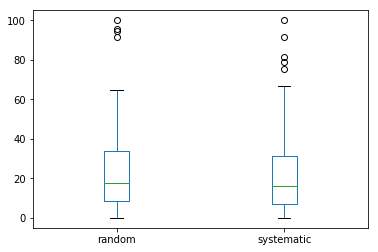

In [36]:
random_and_systematic_coverage = pd.concat(
    [random_coverage_per_app.rename('random'), systematic_coverage_per_app.rename('systematic')], axis=1,
    sort=False)
# random_and_systematic_coverage = random_and_systematic_coverage[
#     (random_and_systematic_coverage.random != 0) & (random_and_systematic_coverage.systematic != 0)]
random_and_systematic_coverage.plot.box()
random_and_systematic_coverage.describe()

Block app coverage

In [43]:
random_block_coverage = CoverageHelper.filter("block", "random", coverage_df)
random_block_coverage_per_app = CoverageHelper.calc_coverage(random_block_coverage)
random_block_coverage_per_app.describe()


count    412.000000
mean      20.452509
std       18.946459
min        0.000000
25%        6.465338
50%       14.102564
75%       30.545257
max      100.000000
Name: percentage_covered, dtype: float64

In [44]:
systematic_block_coverage = CoverageHelper.filter("block", "systematic", coverage_df)
systematic_block_coverage_per_app = CoverageHelper.calc_coverage(systematic_block_coverage)
systematic_block_coverage_per_app.describe()
# systematic_block_coverage_per_app.describe()


count    412.000000
mean      19.041924
std       18.382206
min        0.000000
25%        5.468270
50%       13.560662
75%       27.942011
max      100.000000
Name: percentage_covered, dtype: float64

In [39]:
random_and_systematic_block_coverage = pd.concat(
    [random_block_coverage_per_app.rename('random'), systematic_block_coverage_per_app.rename('systematic')], axis=1,
    sort=False)
random_and_systematic_block_coverage.head()


,random,systematic
app,,
alex.map.maps,20.455874,7.071888
androidlab.carlog,10.744052,11.926049
appinventor.ai_agiapplications.CountYourSteps,0.000000,0.000000
asp.aniemo.pack6.ext,56.593407,56.593407
bestfreelivewallpapers.funny_photo_editor,5.770879,4.361941


,random,systematic
count,412.000000,412.000000
mean,22.195151,20.586701
std,18.177584,17.528328
min,0.000000,0.000000
25%,8.652004,7.209172
50%,17.550341,16.022451
75%,33.899996,31.441248
max,100.000000,100.000000


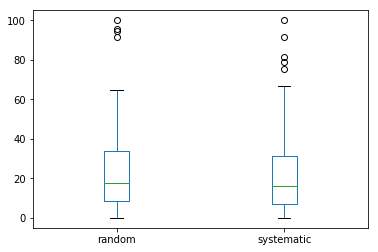

In [40]:
# random_and_systematic_coverage = random_and_systematic_coverage[
#     (random_and_systematic_coverage.random != 0) & (random_and_systematic_coverage.systematic != 0)]
random_and_systematic_coverage.plot.box()
plt.savefig("./data/boxplot-random-systematic-coverage.pdf", dpi=1200)
random_and_systematic_coverage.describe()

,diff_coverage
count,412.000000
mean,1.410585
std,7.711823
min,-42.345277
25%,0.000000
50%,0.000000
75%,1.409215
max,97.364086


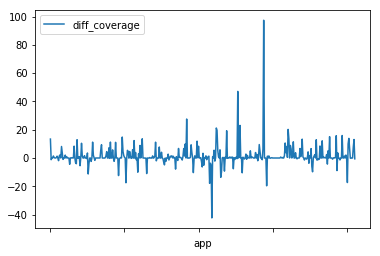

In [32]:
diff_in_coverage_per_app = random_and_systematic_block_coverage['random'] - random_and_systematic_block_coverage['systematic']
# systematic_block_coverage_per_app['percentage_covered'] = (systematic_block_coverage_per_app.covered_lines / systematic_block_coverage_per_app.total_lines) * 100
diff_in_coverage_per_app = diff_in_coverage_per_app.to_frame(name="diff_coverage")
diff_in_coverage_per_app.plot()
# diff_in_coverage_per_app["total_lines"] = random_block_coverage_per_app.total_lines
diff_in_coverage_per_app.head()
diff_in_coverage_per_app.describe()

In [15]:
diff_in_coverage_per_app.diff_coverage.describe()


count    412.000000
mean       1.410585
std        7.711823
min      -42.345277
25%        0.000000
50%        0.000000
75%        1.409215
max       97.364086
Name: diff_coverage, dtype: float64

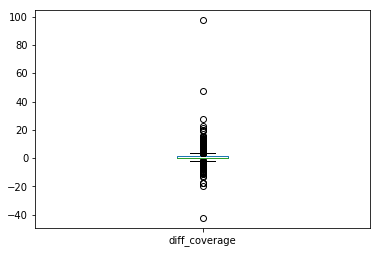

In [16]:
diff_in_coverage_per_app.diff_coverage.plot.box()

,diff_coverage,total_lines
diff_coverage,1.000000,-0.006167
total_lines,-0.006167,1.000000


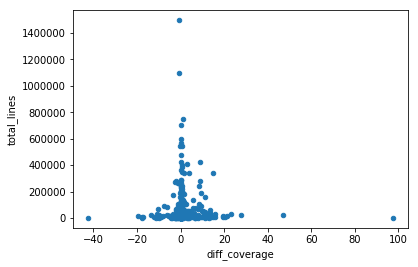

In [17]:
diff_in_coverage_per_app.plot.scatter(x=0, y="total_lines")
diff_in_coverage_per_app.corr()

,random,systematic,total_lines
app,,,
alex.map.maps,20.455874,7.071888,6844
androidlab.carlog,10.744052,11.926049,6599
appinventor.ai_agiapplications.CountYourSteps,0.000000,0.000000,527
asp.aniemo.pack6.ext,56.593407,56.593407,182
bestfreelivewallpapers.funny_photo_editor,5.770879,4.361941,121368


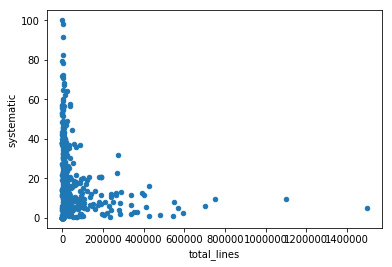

In [18]:

test = random_and_systematic_block_coverage
test["total_lines"] = random_block_coverage_per_app.total_lines
test.plot.scatter(y="systematic", x= "total_lines")
test.head()
